# ANNDA Lab2 Group 30

[Lab2 instruction](https://canvas.kth.se/courses/45184/files/7422819?wrap=1)

When you successfully complete the assignment you should:
* know how to build the structure and perform training of an RBF network
for either classification or regression purposes
* be able to comparatively analyse different methods for initialising the
structure and learning the weights in an RBF network
* know the concept of vector quantisation and learn how to use it in NN
context
* be able to recognise and implement different components in the SOM
algorithm
* be able to discuss the role of the neighbourhood and analyse its effect on
the self-organisation in SOMs
* know how SOM-networks can be used to fold high-dimensional spaces and
cluster data





In [ ]:
# Download and unzip data_lab2.zip

!wget -O data_lab2.zip "https://drive.usercontent.google.com/u/0/uc?id=1eWc4ROE_p0Xe4RT_6QvVXK5LB3kbjfzI&export=download"
!unzip data_lab2.zip https://drive.google.com/file/d/17ohUOzTU3jfF0fT_RTlCxUwq16L-T1UX/view?usp=drive_link

--2024-03-02 22:55:29--  https://drive.usercontent.google.com/u/0/uc?id=1eWc4ROE_p0Xe4RT_6QvVXK5LB3kbjfzI&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.164.1, 2607:f8b0:4025:803::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.164.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.usercontent.google.com/uc?id=1eWc4ROE_p0Xe4RT_6QvVXK5LB3kbjfzI&export=download [following]
--2024-03-02 22:55:29--  https://drive.usercontent.google.com/uc?id=1eWc4ROE_p0Xe4RT_6QvVXK5LB3kbjfzI&export=download
Reusing existing connection to drive.usercontent.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eWc4ROE_p0Xe4RT_6QvVXK5LB3kbjfzI&export=download [following]
--2024-03-02 22:55:29--  https://drive.usercontent.google.com/download?id=1eWc4ROE_p0Xe4RT_6QvVXK5LB3kbjfzI&export=download
Reusing exi

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1: RBF

## Batch mode training using least squares - supervised learning of network weights

Number of iteration: 39
Absolute Residual Error (sin(2x)): 0.06329686355118845
Absolute Residual Error (square(2x)): 0.0911214354222585


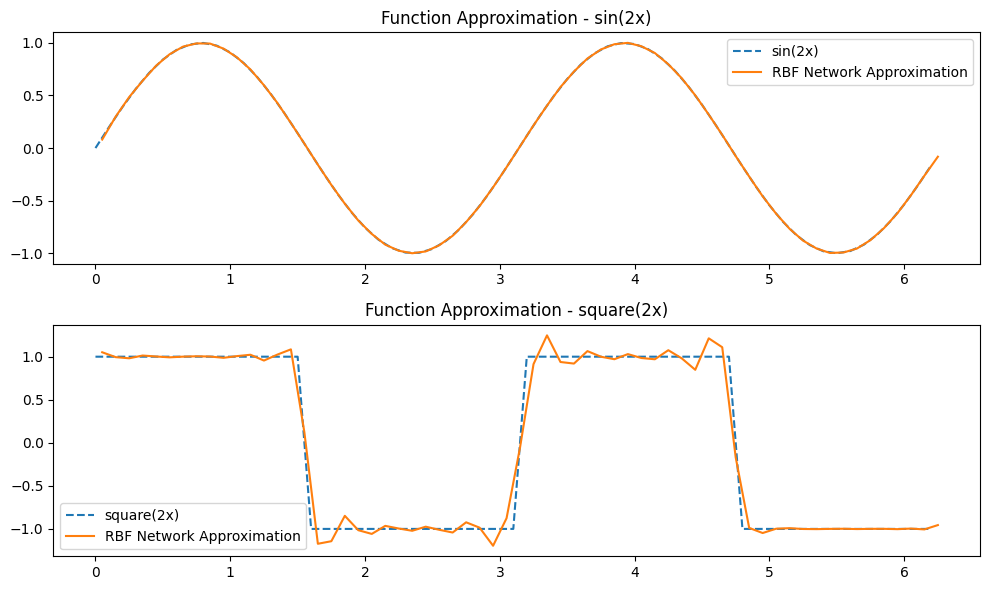

In [ ]:


rbf_variance = 0.1
num_rbf_nodes = 40
iteration = num_rbf_nodes


#Define the input space
input_space = np.arange(0, 2 * np.pi, 0.1)
test_input_space = np.arange(0.05, 2 * np.pi, 0.1)

#Define Target Functions
def target_function_1(x):
    return np.sin(2 * x)

def target_function_2(x):
    i = np.sin(2 * x)
    for j in range(len(i)):
        if i[j] >= 0:
            i[j] = 1
        else:
            i[j] = -1
    return i

#Calculate Activations

def gaussian_activation(x, mi, sigma):
    return np.exp(-((x-mi)**2)/ (2 * (sigma ** 2)))


def calculate_residual_error(predictions, targets):
    return np.mean(np.abs(targets- predictions))




#Create RBF Nodes
#the position of the nodes

for num_rbf_nodes in range(iteration):
    rbf_nodes = np.linspace(0, 2 * np.pi, num=num_rbf_nodes)


phi_train = np.zeros((len(input_space), num_rbf_nodes))
for i, x in enumerate(input_space):
    for j, w in enumerate(rbf_nodes):
        phi_train[i, j] = gaussian_activation(x, w, rbf_variance)

# Target values for the two functions
target_values_1 = target_function_1(input_space)
target_values_2 = target_function_2(input_space)
# Calculate weights for each target function (phi . weight = target_value)
w1= np.linalg.lstsq(phi_train, target_values_1, rcond=None)
weights_1 = w1[0]
w2 = np.linalg.lstsq(phi_train, target_values_2, rcond=None)
weights_2 = w2[0]



  # Evaluate RBF network on the testing set

phi_test = np.zeros((len(test_input_space), num_rbf_nodes))
for i, x in enumerate(test_input_space):
    for j, w in enumerate(rbf_nodes):
          phi_test[i, j] = gaussian_activation(x, w, rbf_variance)
    approximation_1 = np.dot(phi_test, weights_1)
    approximation_2 = np.dot(phi_test, weights_2)


  # Calculate Absolute Residual Error
residual_error_1 = calculate_residual_error(approximation_1, target_values_1)
residual_error_2 = calculate_residual_error(approximation_2, target_values_2)

print("Number of iteration:", num_rbf_nodes)
print("Absolute Residual Error (sin(2x)):" ,residual_error_1)
print("Absolute Residual Error (square(2x)):",residual_error_2)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(input_space, target_values_1, label='sin(2x)', linestyle='--')
plt.plot(test_input_space, approximation_1, label='RBF Network Approximation')
plt.title('Function Approximation - sin(2x)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(input_space, target_values_2, label='square(2x)', linestyle='--')
plt.plot(test_input_space,(approximation_2), label='RBF Network Approximation')
plt.title('Function Approximation - square(2x)')
plt.legend()

plt.tight_layout()
plt.show()


## Regression with noise

Number of RBF Nodes: 40
Online Learning - Absolute Residual Error (sin(2x)): 0.38012961487750435
Online Learning - Absolute Residual Error (square(2x)): 0.37370296013971344
Batch Learning - Absolute Residual Error (sin(2x)): 0.18545775275318852
Batch Learning - Absolute Residual Error (square(2x)): 0.16997403037138847


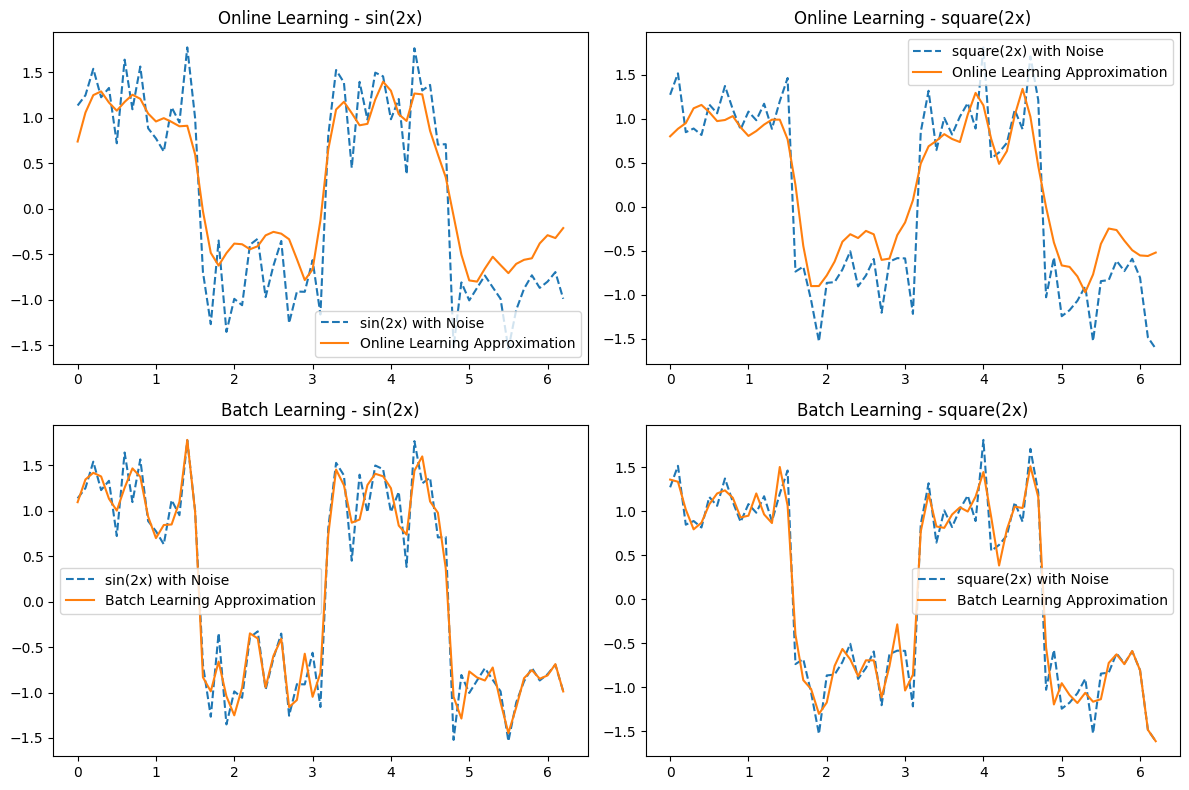

In [ ]:
# Define constants
rbf_variance = 0.1
num_rbf_nodes = 40
# Learning rate for online learning
learning_rate = 0.01
# Number of epochs for online learning
num_epochs = 40



# Define the input space
input_space = np.arange(0, 2 * np.pi, 0.1)
#0.05
test_input_space = np.arange(0, 2 * np.pi, 0.1)

# Define Target Functions with added noise
def add_noise(func, variance=0.1):
    noise = np.random.normal(0, np.sqrt(variance), len(input_space))
    return func + noise

noisy_target_values_1 = add_noise(target_function_2( input_space))
noisy_target_values_2 = add_noise(target_function_2(input_space))

# Calculate Activations
def gaussian_activation(x, mi, sigma):
    return np.exp(-((x - mi) ** 2) / (2 * (sigma ** 2)))

# Create RBF Nodes
rbf_nodes = np.linspace(0, 2 * np.pi, num=num_rbf_nodes)

# Initialize weights for online learning
weights_online_1 = np.random.rand(num_rbf_nodes)
weights_online_2 = np.random.rand(num_rbf_nodes)

# Online learning with delta rule
for epoch in range(num_epochs):
    shuffled_indices = np.random.permutation(len(input_space))

    for index in shuffled_indices:
        x = input_space[index]
        noisy_target_1 = noisy_target_values_1[index]
        noisy_target_2 = noisy_target_values_2[index]

        phi_train = np.array([gaussian_activation(x, w, rbf_variance) for w in rbf_nodes])

        # Update weights using delta rule
        weights_online_1 += learning_rate * (noisy_target_1 - np.dot(phi_train, weights_online_1)) * phi_train
        weights_online_2 += learning_rate * (noisy_target_2 - np.dot(phi_train, weights_online_2)) * phi_train

# Batch learning using least squares
phi_train = np.zeros((len(input_space), num_rbf_nodes))
for i, x in enumerate(input_space):
    for j, w in enumerate(rbf_nodes):
        phi_train[i, j] = gaussian_activation(x, w, rbf_variance)

# Calculate weights for each target function
weights_batch_1 = np.linalg.lstsq(phi_train, noisy_target_values_1, rcond=None)[0]
weights_batch_2 = np.linalg.lstsq(phi_train, noisy_target_values_2, rcond=None)[0]

# Evaluate RBF network on the testing set for both learning approaches
phi_test = np.zeros((len(test_input_space), num_rbf_nodes))
for i, x in enumerate(test_input_space):
    for j, w in enumerate(rbf_nodes):
        phi_test[i, j] = gaussian_activation(x, w, rbf_variance)

approximation_online_1 = np.dot(phi_test, weights_online_1)
approximation_online_2 = np.dot(phi_test, weights_online_2)

approximation_batch_1 = np.dot(phi_test, weights_batch_1)
approximation_batch_2 = np.dot(phi_test, weights_batch_2)

# Calculate Absolute Residual Error for both learning approaches
residual_error_online_1 = calculate_residual_error(approximation_online_1, noisy_target_values_1)
residual_error_online_2 = calculate_residual_error(approximation_online_2, noisy_target_values_2)

residual_error_batch_1 = calculate_residual_error(approximation_batch_1, noisy_target_values_1)
residual_error_batch_2 = calculate_residual_error(approximation_batch_2, noisy_target_values_2)

# Print results
print("Number of RBF Nodes:", num_rbf_nodes)
print("Online Learning - Absolute Residual Error (sin(2x)):", residual_error_online_1)
print("Online Learning - Absolute Residual Error (square(2x)):", residual_error_online_2)
print("Batch Learning - Absolute Residual Error (sin(2x)):", residual_error_batch_1)
print("Batch Learning - Absolute Residual Error (square(2x)):", residual_error_batch_2)

# Plot results for online learning
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(input_space, noisy_target_values_1, label='sin(2x) with Noise', linestyle='--')
plt.plot(test_input_space, approximation_online_1, label='Online Learning Approximation')
plt.title('Online Learning - sin(2x)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(input_space, noisy_target_values_2, label='square(2x) with Noise', linestyle='--')
plt.plot(test_input_space, approximation_online_2, label='Online Learning Approximation')
plt.title('Online Learning - square(2x)')
plt.legend()

# Plot results for batch learning
plt.subplot(2, 2, 3)
plt.plot(input_space, noisy_target_values_1, label='sin(2x) with Noise', linestyle='--')
plt.plot(test_input_space, approximation_batch_1, label='Batch Learning Approximation')
plt.title('Batch Learning - sin(2x)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(input_space, noisy_target_values_2, label='square(2x) with Noise', linestyle='--')
plt.plot(test_input_space, approximation_batch_2, label='Batch Learning Approximation')
plt.title('Batch Learning - square(2x)')
plt.legend()

plt.tight_layout()
plt.show()


## Competitive learning (CL) to initialize RBF units



load data

Absolute Residual Error (sin(2x)) Without CL: 0.06329686355118845
Absolute Residual Error with CL: 0.007765479014806111
Noisy: Online Learning - Absolute Residual Error (sin(2x) Without CL ): 0.38012961487750435
Noisy: Online Learning - Absolute Residual Error (sin(2x)) With CL: 0.19995551125558517


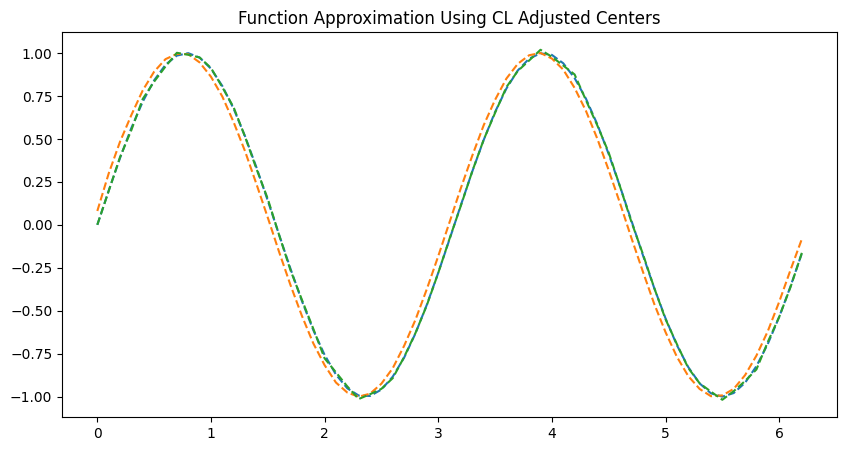

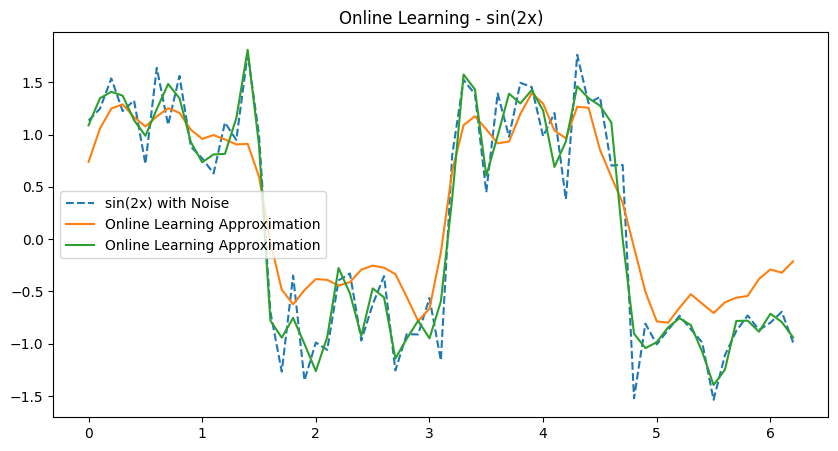

In [ ]:

# Constants
rbf_variance = 0.1
num_rbf_nodes = 40
learning_rate = 0.01
n_iterations = 40

# Target function
def target_function(x):
    return np.sin(2 * x)

# Gaussian activation function
def gaussian_activation(x, centers, sigma):
    return np.exp(-np.square(x[:, None] - centers) / (2 * sigma**2))

# Calculate residual error
def calculate_residual_error(predictions, targets):
    return np.mean(np.abs(targets - predictions))

# Adjust RBF centers using Competitive Learning (CL)
def adjust_centers_CL(X, learning_rate, n_centers, n_iterations):
    centers = np.linspace(X.min(), X.max(), n_centers)
    for _ in range(n_iterations):
        for x in X:
            distances = np.abs(x - centers)
            closest_idx = np.argmin(distances)
            centers[closest_idx] += learning_rate * (x - centers[closest_idx])
    return centers

# Training RBF network
def train_rbf_network(X, Y, centers, sigma):
    phi = gaussian_activation(X, centers, sigma)
    weights = np.linalg.lstsq(phi, Y, rcond=None)[0]
    return weights

target_values = target_function(input_space)

    # Adjust centers using CL
centers_CL = adjust_centers_CL(input_space, learning_rate, num_rbf_nodes, n_iterations)

    # Train RBF network with adjusted centers
weights_CL = train_rbf_network(input_space, target_values, centers_CL, rbf_variance)

    # Prediction using CL centers
phi_test_CL = gaussian_activation(input_space, centers_CL, rbf_variance)
predictions_CL = phi_test_CL.dot(weights_CL)




   # ONLINE MODE
centers_CL = adjust_centers_CL(input_space, learning_rate, num_rbf_nodes, n_iterations)

    # Train RBF network with adjusted centers
weights_CL = train_rbf_network(input_space, noisy_target_values_1, centers_CL, rbf_variance)

    # Prediction using CL centers
phi_test_CL = gaussian_activation(input_space, centers_CL, rbf_variance)
predictions_CL_noisy = phi_test_CL.dot(weights_CL)

    # Calculate Absolute Residual Error
residual_error_CL = calculate_residual_error(predictions_CL, target_values)
residual_error_CL_noisy = calculate_residual_error(predictions_CL_noisy, noisy_target_values_1)


print("Absolute Residual Error (sin(2x)) Without CL:" ,residual_error_1)
print("Absolute Residual Error with CL:", residual_error_CL)
print("Noisy: Online Learning - Absolute Residual Error (sin(2x) Without CL ):", residual_error_online_1)
print("Noisy: Online Learning - Absolute Residual Error (sin(2x)) With CL:", residual_error_CL_noisy)


    # Plotting
plt.figure(figsize=(10, 5))
plt.plot(input_space, target_values, label='Target Function', linestyle='--')
plt.plot(test_input_space, approximation_1, label='RBF Network Approximation',linestyle='--')
plt.plot(input_space, predictions_CL, label='RBF-CL Approximation',linestyle='--')
plt.title('Function Approximation Using CL Adjusted Centers')


# Plot results for online learning
plt.figure(figsize=(10, 5))
plt.plot(input_space, noisy_target_values_1, label='sin(2x) with Noise', linestyle='--')
plt.plot(test_input_space, approximation_online_1, label='Online Learning Approximation')
plt.plot(input_space, predictions_CL_noisy, label='Online Learning Approximation')
plt.title('Online Learning - sin(2x)')



plt.legend()
plt.show()


Absolute Residual Error (sin(2x) with 3 winning nodes): 0.029950836788833726
Online Learning - Absolute Residual Error (sin(2x)) With CL: 0.007765479014806111
Noisy: Absolute Residual Error (sin(2x) with 3 winning nodes): 0.11504113167272507
Noisy: Online Learning - Absolute Residual Error (sin(2x)) With CL: 0.19995551125558517


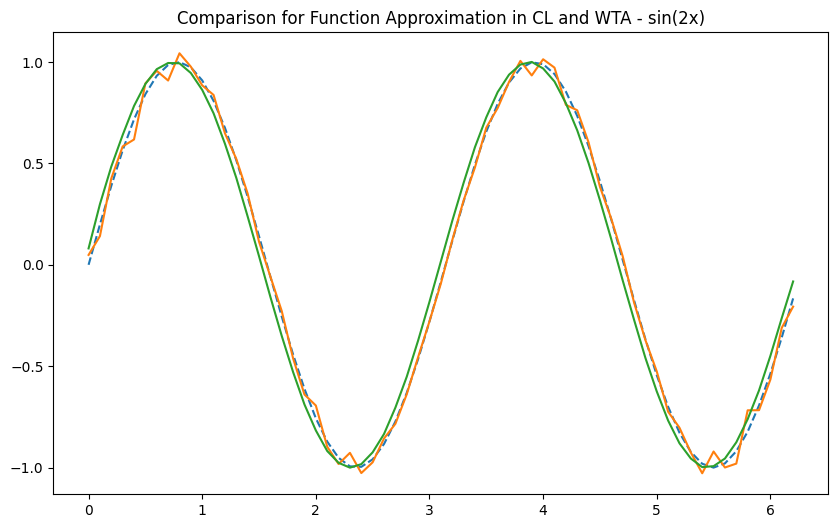

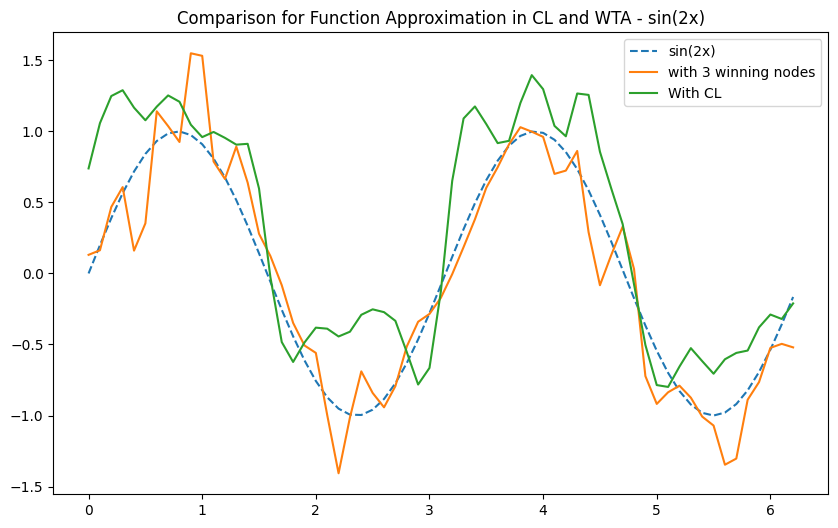

In [ ]:

def adjust_centers_CL_avoiding_dead_units(input_x, learning_rate, n_centers, width, n_iterations, number_of_winner):
    centers = np.linspace(input_x.min(), input_x.max(), n_centers)
    for _ in range(n_iterations):
        for x_i in input_x:
            distances = np.abs(x_i - centers)
            closest_idxs = np.argsort(distances)[:number_of_winner]
            for idx in closest_idxs:
                centers[idx] += learning_rate * (x_i - centers[idx])
    return centers

# Constants
number_of_nodes = 40
n_iterations = 40
width = 0.1
learning_rate = 0.01
number_of_winner = 3


input_space = np.arange(0, 2 * np.pi, 0.1)
target_values_1 = target_function_1(input_space)
centers_CL_w = adjust_centers_CL_avoiding_dead_units(input_space, learning_rate, number_of_nodes, width, n_iterations, number_of_winner)
weights_CL_w = train_rbf_network(input_space, target_values_1, centers_CL_w, width)
phi_test_CL_w = gaussian_activation(input_space, centers_CL_w, width)
predictions_CL_w = phi_test_CL_w.dot(weights_CL_w)
residual_error_1_ww = calculate_residual_error(predictions_CL_w, target_values_1)


noisy_target_values_1 = add_noise(target_function_1(input_space))
noisy_centers_CL_w = adjust_centers_CL_avoiding_dead_units(input_space, learning_rate, number_of_nodes, width, n_iterations, number_of_winner)
noisy_weights_CL_w = train_rbf_network(input_space, noisy_target_values_1, noisy_centers_CL_w, width)
noisy_phi_test_CL_w = gaussian_activation(input_space, noisy_centers_CL_w, width)
noisy_predictions_CL_w = noisy_phi_test_CL_w.dot(noisy_weights_CL_w)

noisy_residual_error_1_w = calculate_residual_error(noisy_predictions_CL_w, noisy_target_values_1)

print("Absolute Residual Error (sin(2x) with 3 winning nodes):", residual_error_1_ww)
print("Online Learning - Absolute Residual Error (sin(2x)) With CL:", residual_error_CL)
print("Noisy: Absolute Residual Error (sin(2x) with 3 winning nodes):", noisy_residual_error_1_w)
print("Noisy: Online Learning - Absolute Residual Error (sin(2x)) With CL:", residual_error_CL_noisy)


# Plotting the results


plt.figure(figsize=(10, 6))
plt.plot(input_space, target_values_1, label='sin(2x)', linestyle='--')
plt.plot(input_space, predictions_CL_w, label='with 3 winning nodes')
plt.plot(input_space, approximation_1, label='With CL')
plt.title('Comparison for Function Approximation in CL and WTA - sin(2x)')


plt.figure(figsize=(10, 6))
plt.plot(input_space, target_values_1, label='sin(2x)', linestyle='--')
plt.plot(input_space, noisy_predictions_CL_w, label='with 3 winning nodes')
plt.plot(input_space, approximation_online_1, label='With CL')
plt.title('Comparison for Function Approximation in CL and WTA - sin(2x)')
plt.legend()
plt.show()

Model error: 0.0035723512086618696


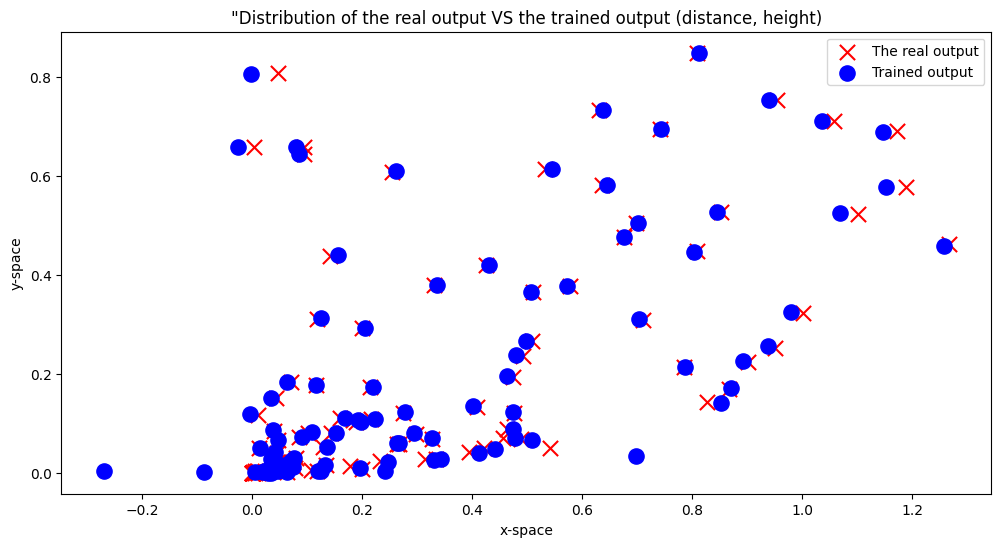

In [ ]:
ballist_train_path = '/content/ballist.dat' #To change later
ballist_test_path = '/content/balltest.dat' #To change later
import numpy as np
from numpy.linalg import norm, pinv
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


def intilize_rbf(X, k):
    np.random.seed(42)
    indices = np.random.choice(len(X), k, replace=False)
    centers = X[indices]
    while True:
        labels = np.argmin(norm(X[:, None] - centers, axis=-1), axis=1)
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers

# Competitive learning for adjusting RBF centers


def competitive_learning(X, centers, learning_rate, n_iterations):
    for _ in range(n_iterations):
        for x in X:
            distances = norm(x - centers, axis=1)
            closest_idx = np.argmin(distances)
            centers[closest_idx] += learning_rate * (x - centers[closest_idx])
    return centers

# Calculate the RBF
def rbf_function(X, centers, width):
    return np.exp(-norm(X[:, None] - centers, axis=-1) ** 2 / (2 * width ** 2))

# Training the RBF network
def train_rbf_network(X, Y, centers, width):
    RBF_X = rbf_function(X, centers, width)
    weights = pinv(RBF_X).dot(Y)  #Using pseudo-inverse for simplicity
    return weights

# Predict function
def predict_rbf_network(X, centers, weights, width):
    RBF_X = rbf_function(X, centers, width)
    return RBF_X.dot(weights)

# Evaluate the model
def evaluate_model(predictions, targets):
    return norm(predictions - targets) / len(targets)

# Parameters
n_centers = 30
width = 0.8
learning_rate = 0.01
n_itration = 1000


train_data = np.loadtxt(ballist_train_path)
test_data = np.loadtxt(ballist_test_path)

# Initialize the scaler
input_scaler = MinMaxScaler()
output_scaler = MinMaxScaler()

# Split the data into inputs and outputs
inputs_train = train_data[:, :2]
outputs_train = train_data[:, 2:]
inputs_test = test_data[:, :2]
outputs_test = test_data[:, 2:]

# Fit and transform the inputs
inputs_train_scaled = input_scaler.fit_transform(inputs_train)
inputs_test_scaled = input_scaler.transform(inputs_test)

# Fit and transform the outputs
outputs_train_scaled = output_scaler.fit_transform(outputs_train)
outputs_test_scaled = output_scaler.transform(outputs_test)

# Initialize centers
centers = intilize_rbf(inputs_train_scaled, n_centers)

# Adjust centers using competitive learning
centers = competitive_learning(inputs_train_scaled, centers, learning_rate, n_itration)

# Train the network
weights = train_rbf_network(inputs_train_scaled, outputs_train_scaled, centers, width)

# Predict on test data
predictions_test = predict_rbf_network(inputs_test_scaled, centers, weights, width)

# Evaluate model
error = evaluate_model(predictions_test, outputs_test_scaled)
print(f"Model error: {error}")
plt.figure(figsize=(12, 6))

plt.scatter(outputs_test_scaled[:,0], outputs_test_scaled[:,1],s=120, marker='x', color='red', label='The real output')

# Plot adjusted centers
plt.scatter(predictions_test[:, 0], predictions_test[:, 1], s=120, marker='o', color='blue', label='Trained output')

# Plot the inputs for context
#plt.scatter(inputs_train_scaled[:, 0], inputs_train_scaled[:, 1], alpha=0.2, color='gray', label='Inputs')

plt.xlabel('x-space')
plt.ylabel('y-space')
plt.title('"Distribution of the real output VS the trained output (distance, height)')
plt.legend()
plt.show()

# Part 2: SOMs

## Topological Ordering of Animal Species

## Cyclic Tour

## Data Clustering: Votes of MPs